In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Verinin Hikayesi**

1936 yılında İngiliz istatistikçi ve biyolog Ronald Fisher'ın iris çiçeğinin 3 türünden (setosa, versicolor, virginica) 50şer tane toplayıp bu çiçeklerin çanak (sepal) ve taç (petal) yapraklarının uzunluklarını ölçerek bu veri setini hazırlamıştır.
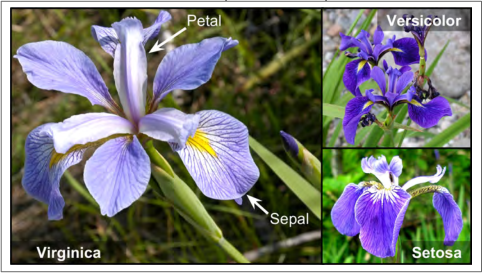

Aşağıda ihtiyacımız doğrultusunda kullanacağımız kütüphaneleri yükleyelim.

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd

Veri çerçevemizi bulunduğumuz dizinden yükleyelim ve bir veri çerçevesi haline getirerek df değişkenine atayalım. (pd.read_csv(...csv))

In [ ]:
df = pd.read_csv("../input/iris-flower-dataset/IRIS.csv").copy()

Veri çerçevesinin ilk 5 gözlemini görüntüleyelim.

In [ ]:
df.head(5)

In [ ]:
df.tail() # veri çerçevesinin son 5 gözlemini görüntüleyelim.

Veri çerçevesinin kaç öznitelik ve kaç gözlemden oluştuğunu görüntüleyelim.

In [ ]:
df.shape

Veri çerçevesindeki değişkenlerin hangi tipte olduğunu ve bellek kullanımını görüntüleyelim.

In [ ]:
df.info()

Veri çerçevesindeki sayısal değişkenler için temel istatistik değerlerini görüntüleyelim.

Standart sapma ve ortalama değerlerden çıkarımda bulunarak hangi değişkenlerin ne kadar varyansa sahip olduğu hakkında fikir yürütelim.

In [ ]:
df.describe().T

Veri çerçevesinde hangi öznitelikte kaç adet eksik değer olduğunu gözlemleyelim.

In [ ]:
df.isna().sum()

Sayısal değişkenler arasında korelasyon olup olmadığını göstermek için korelasyon matrisi çizdirelim. Korelasyon katsayıları hakkında fikir yürütelim.

En güçlü pozitif ilişki hangi iki değişken arasındadır?

In [ ]:
df.corr()

Korelasyon katsayılarını daha iyi okuyabilmek için ısı haritası çizdirelim.

In [ ]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

Veri çerçevemizin hedef değişkeninin "variety" benzersiz değerlerini görüntüleyelim.

In [ ]:
df["species"].unique()

Veri çerçevemizin hedef değişkeninin "variety" benzersiz kaç adet değer içerdiğini görüntüleyelim.

In [ ]:
df["species"].nunique()

Veri çerçevesindeki sepal.width ve sepal.length değişkenlerinin sürekli olduğunu görüyoruz. Bu iki sürekli veriyi görselleştirmek için önce scatterplot kullanalım.

In [ ]:
sns.scatterplot(x = "sepal_width", y = "sepal_length", data = df);

Aynı iki veriyi daha farklı bir açıdan frekanslarıyla incelemek için jointplot kullanarak görselleştirelim. 

In [ ]:
sns.jointplot(x = "sepal_width", y = "sepal_length", data = df);

Aynı iki veriyi scatterplot ile tekrardan görselleştirelim fakat bu sefer "variety" parametresi ile hedef değişkenine göre kırdıralım. 

3 farklı renk arasında sepal değişkenleriyle bir kümeleme yapılabilir mi? Ne kadar ayırt edilebilir bunun üzerine düşünelim.

In [ ]:
sns.scatterplot(x="sepal_width",y="sepal_length",hue="species",data=df)

In [ ]:
df.groupby(["species"]).describe()["sepal_length"] #türlere göre "sepal_length" değişkeninin dağılımı.

In [ ]:
sns.catplot(y = "sepal_length", x = "species", data = df); #türlere göre "sepal_length" değişkeninin dağılımı görselleştirme

value_counts() fonksiyonu ile veri çerçevemizin ne kadar dengeli dağıldığını sorgulayalım. 

In [ ]:
df["species"].value_counts()

Keman grafiği çizdirerek sepal.width değişkeninin dağılımını inceleyin. 

Söz konusu dağılım bizim için ne ifade ediyor, normal bir dağılım olduğunu söyleyebilir miyiz?

In [ ]:
sns.violinplot(y="sepal_width",data=df);

Daha iyi anlayabilmek için sepal.width üzerine bir distplot çizdirelim.

In [ ]:
sns.distplot(df["sepal_width"], bins=14,color="blue")

Üç çiçek türü için üç farklı keman grafiğini sepal.length değişkeninin dağılımı üzerine tek bir satır ile görselleştirelim.

In [ ]:
sns.violinplot(y="sepal_length", x="species",data=df)

Hangi çiçek türünden kaçar adet gözlem barındırıyor veri çerçevemiz?

50 x 3 olduğunu ve dengeli olduğunu value_counts ile zaten görmüştük, ancak bunu görsel olarak ifade etmek için sns.countplot() fonksiyonuna variety parametresini vereilm.

In [ ]:
sns.countplot(x="species", data=df)

sepal.length ve sepal.width değişkenlerini sns.jointplot ile görselleştirelim, dağılımı ve dağılımın frekansı yüksek olduğu bölgelerini inceleyelim.

In [ ]:
sns.jointplot(x="sepal_length",y="sepal_width",data=df)

Bir önceki hücrede yapmış olduğumuz görselleştirmeye kind = "kde" parametresini ekleyelim. Böylelikle dağılımın noktalı gösterimden çıkıp yoğunluk odaklı bir görselleştirmeye dönüştüğünü görmüş olacağız.

In [ ]:
sns.jointplot(x="sepal_length",y="sepal_width",data=df,kind="kde",color="green")

scatterplot ile petal.length ve petal.width değişkenlerinin dağılımlarını çizdirelim.

In [ ]:
sns.scatterplot(x="petal_length",y="petal_width",data=df)

Aynı görselleştirmeye hue = "variety" parametresini ekleyerek 3. bir boyut verelim.

In [ ]:
sns.scatterplot(x="petal_length",y="petal_width",data=df, hue="species")

sns.lmplot() görselleştirmesini petal.length ve petal.width değişkenleriyle implemente edelim. Petal length ile petal width arasında ne tür bir ilişki var ve bu ilişki güçlü müdür? sorusunu yanıtlayalım.

In [ ]:
sns.lmplot(x="petal_length",y="petal_width",data=df);

Bu sorunun yanıtını pekiştirmek için iki değişken arasında korelasyon katsayısını yazdıralım. 

In [ ]:
df.corr()["petal_length"]["petal_width"]

In [ ]:
df.groupby(["species"]).describe()["petal_length"] #türlere göre "petal_length" değişkeninin dağılımı.

In [ ]:
#petal_length değişkenini türlere göre kutu grafiğinde inceleyelim
sns.boxplot(x="species",y="petal_length",data=df)

Petal Length ile Sepal Length değerlerini toplayarak yeni bir total length özniteliği oluşturalım.

In [ ]:
df["total_length"]=df["petal_length"]+df["sepal_length"]

total.length'in ortalama değerini yazdıralım. 

In [ ]:
df["total_length"].mean()

In [ ]:
df.groupby(["species"]).describe()["total_length"] #türlere göre "total_length" değişkeninin dağılımı.

total.length'in standart sapma değerini yazdıralım.

In [ ]:
df["total_length"].std()

sepal.length'in maksimum değerini yazdıralım.

In [ ]:
df["total_length"].max()

sepal.length'i 5.5'den büyük ve türü setosa olan gözlemleri yazdıralım.

In [ ]:
df[(df["sepal_length"]>5.5)&(df["species"]=="Iris-setosa")]

petal.length'i 5'den küçük ve türü virginica olan gözlemlerin sadece sepal.length ve sepal.width değişkenlerini ve değerlerini yazdıralım.

In [ ]:
df[(df["petal_length"]<5)&(df["species"]=="Iris-virginica")]

Hedef değişkenimiz variety'e göre bir gruplama işlemi yapalım değişken değerlerimizin ortalamasını görüntüleyelim.

In [ ]:
df.groupby(["species"]).mean()

Hedef değişkenimiz variety'e göre gruplama işlemi yaparak sadece petal.length değişkenimizin standart sapma değerlerini yazdıralım. 

In [ ]:
df.groupby(["species"])["petal_length"].std()

Emeğiniz, ayırdığınız vakit ve ilginiz için teşekkürler.